In this project, you will extract, clean and visualize the dataset from IBM employee attribution and the possible factors for employee attrition. Your task is seen below: 

Using the attr_data.db, extract all the data from the only table in the database using SQL. Once the data is extracted, import the data into Pandas and continue with the analysis. 

The following questions should be answered:

• What do you think are the 3 factors behind employee attrition?
• What is the relationship between Education and Monthly Income?
• What is the effect of age on attrition?
• Is Income the main factor in employee attrition?
• How does work-life balance impact the overall attrition rate?
To submit, push your notebook to your GitHub repo, and share a link to your notebook.

What we would be looking out for:

• Successful extraction of data from database
• Right Execution of Codes
• Code Structure
• Output relationship to the question asked

In [92]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
pd.set_option ('display.max_columns', None)

import sqlalchemy
import nb_black

In [6]:

%sql sqlite:///attr_data.db

'Connected: @attr_data.db'

In [23]:
%%sql

SELECT 
    name
FROM 
    sqlite_schema
WHERE 
    type ='table' AND 
    name NOT LIKE 'sqlite_%';

 * sqlite:///attr_data.db
Done.


name
attrition_records


In [25]:
%%sql

select * from attrition_records
limit 5;

 * sqlite:///attr_data.db
Done.


id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [32]:
engine=sqlalchemy.create_engine('sqlite:///attr_data.db')

In [48]:
def read_query(query, engine):
    conn=engine.connect()
    return pd.read_sql(query,conn)
data=read_query('select * from attrition_records',engine)

• What do you think are the 3 factors behind employee attrition?

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EmployeeNumber            1470 non-null   int64 
 11  EnvironmentSatisfaction   1470 non-null   int64 
 12  Gender                    1470 non-null   object
 13  HourlyRate                1470 non-null   int64 
 14  JobInvolvement          

In [176]:
discrete_features = ['StandardHours','Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
                 'PercentSalaryHike',  'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 
                 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
categorical_features = ['Attrition','EmployeeNumber', 'Over18', 'EmployeeCount', 'BusinessTravel','Department', 'Education', 'EducationField',
                    'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
                    'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
                    'WorkLifeBalance']

df1 = data.copy()

In [96]:
le=LabelEncoder()
for i in categorical_features:
    if type(i)=='object':
        df1[i]=le.fit_transform(df1[i])

In [97]:
df1.head()

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


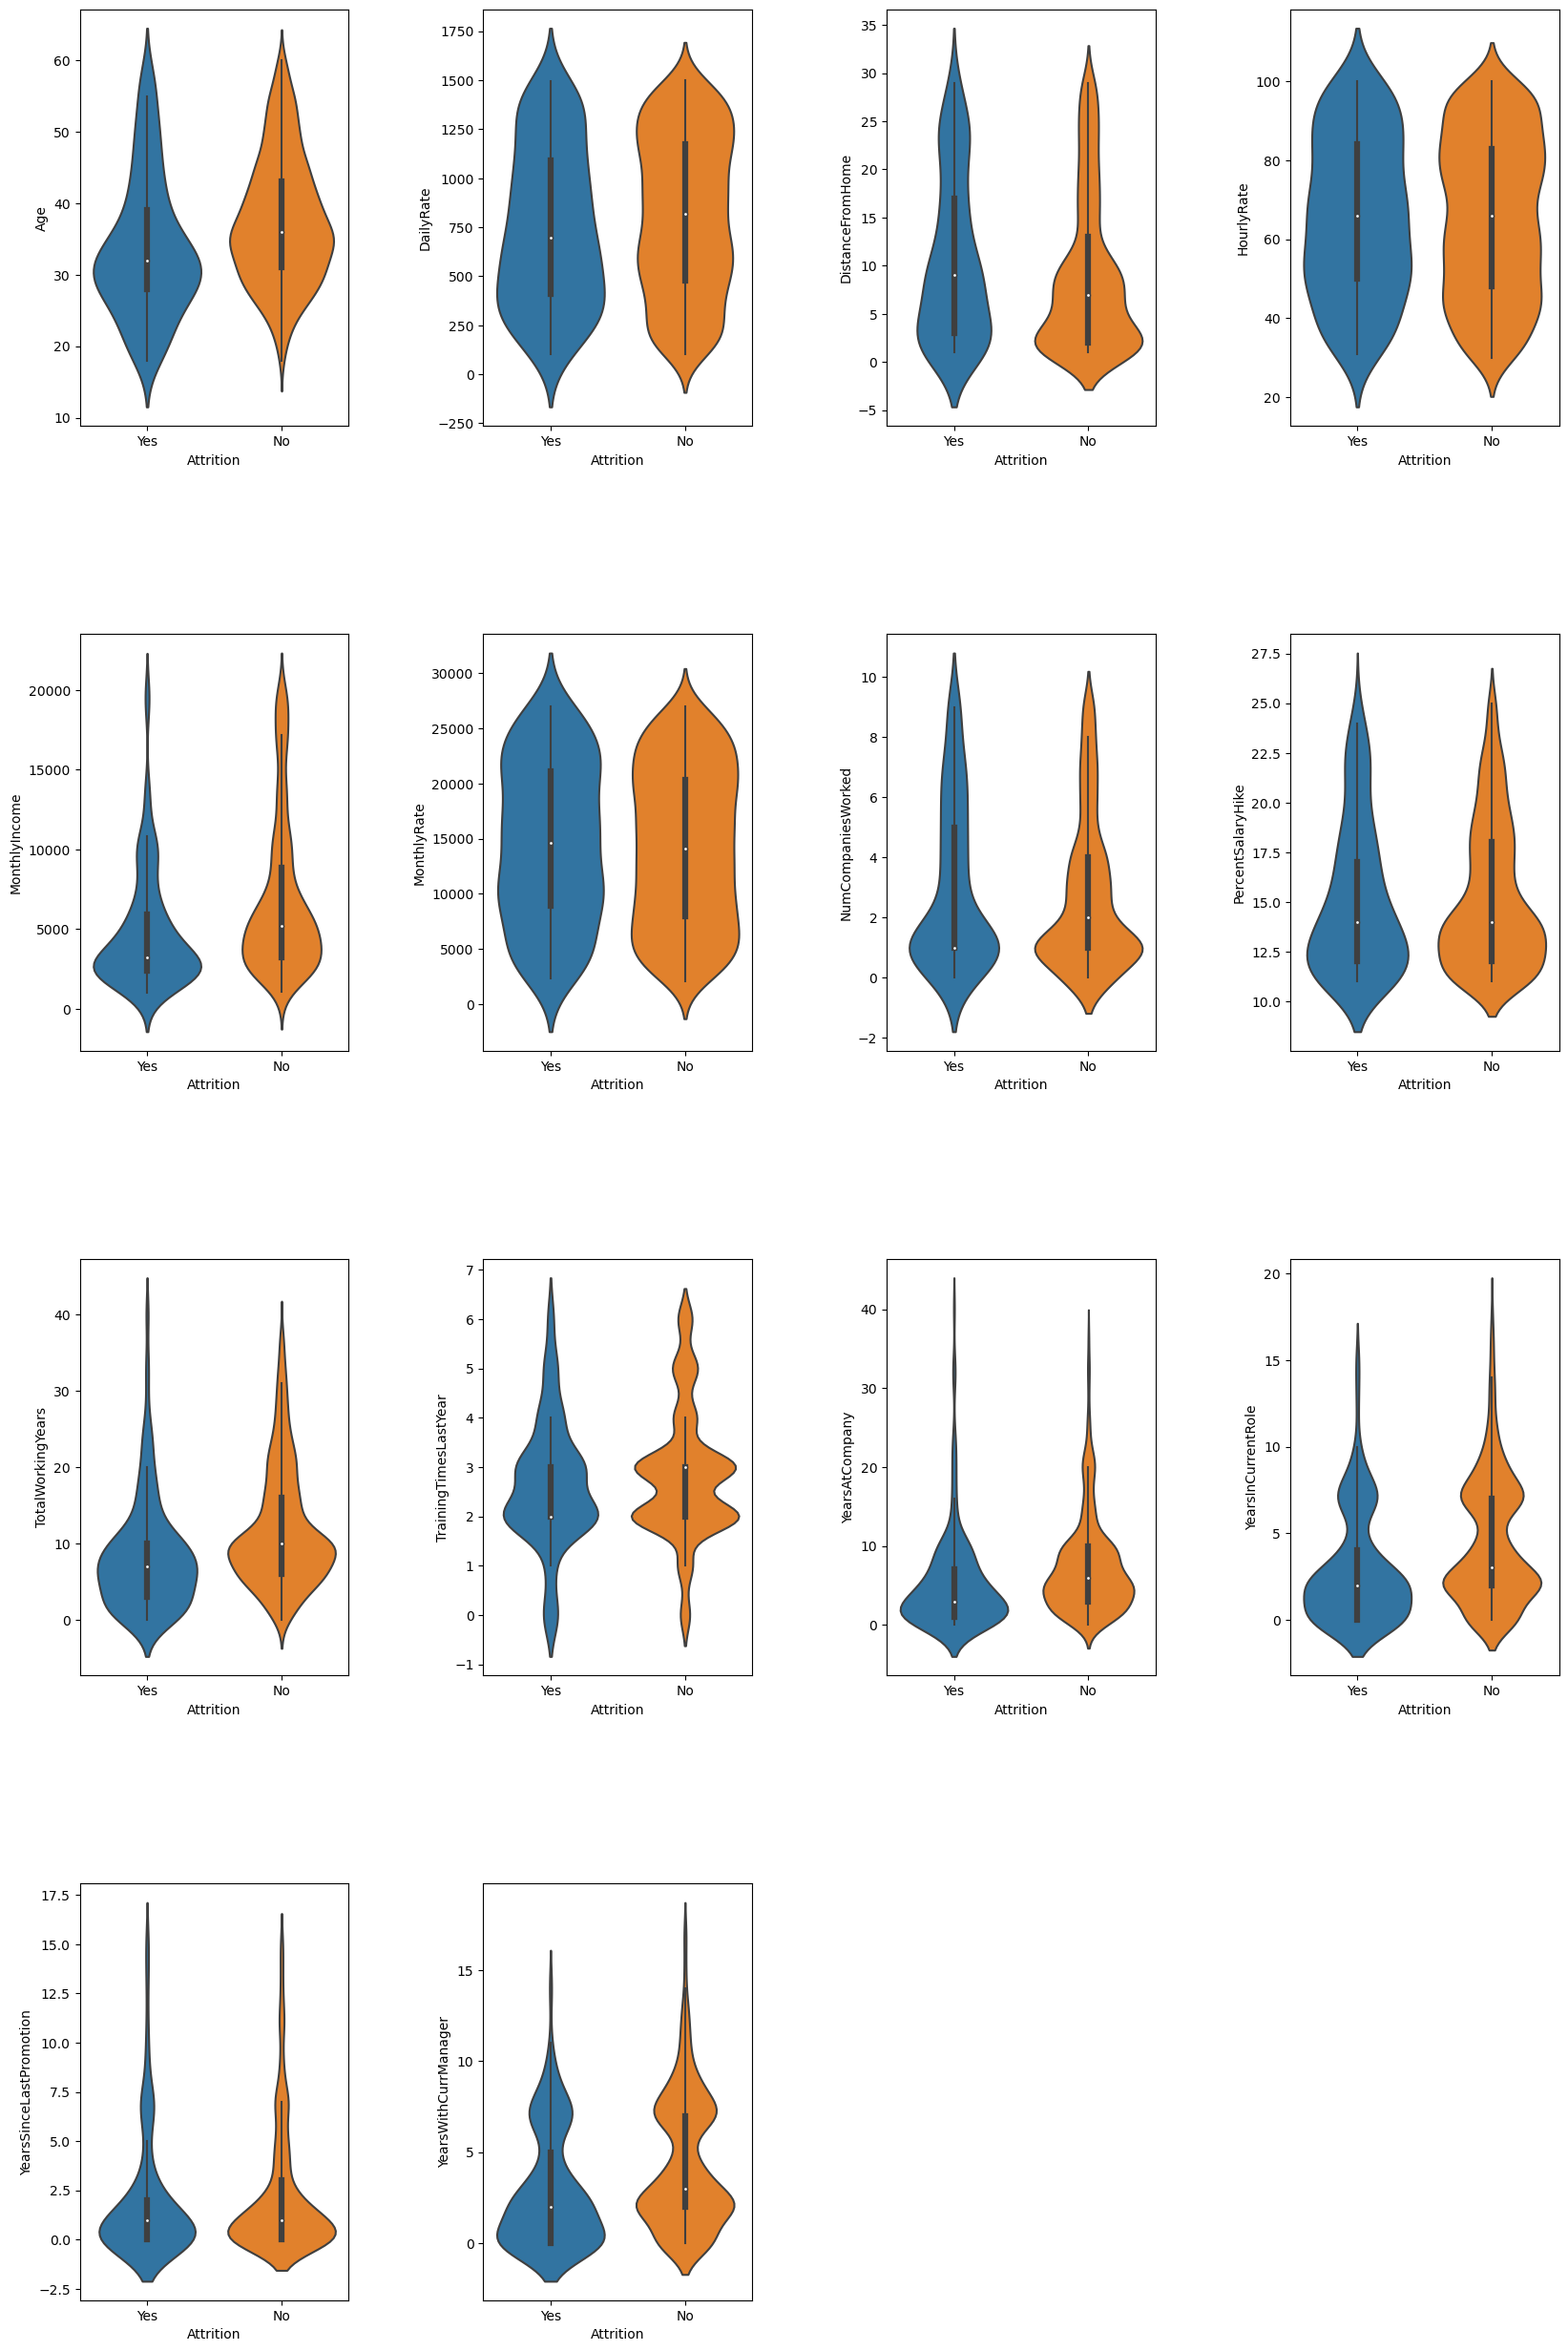

In [178]:
plt.figure(figsize=(20,30))
count=1
for i in discrete_features[1:]:
    plt.subplot(4,4,count)
    sns.violinplot(x='Attrition',y=df1[i],data=df1,)
    count+=1
plt.subplots_adjust(wspace=0.5, hspace=0.5, bottom=0.1, top=0.9)


In [223]:
df1["Attrition_n"] = df1.Attrition.map({"Yes":1, "No":0})
def cat_plot_data(i,df1):
    df2=pd.DataFrame(df1.groupby(i).agg({"Attrition_n": ["mean", "count"]}))
    df2.columns=['mean_attrition','no_attrited']
    df2['percent_attrition']=df2['mean_attrition']*100
    df2.sort_values('percent_attrition',inplace=True)
    return df2

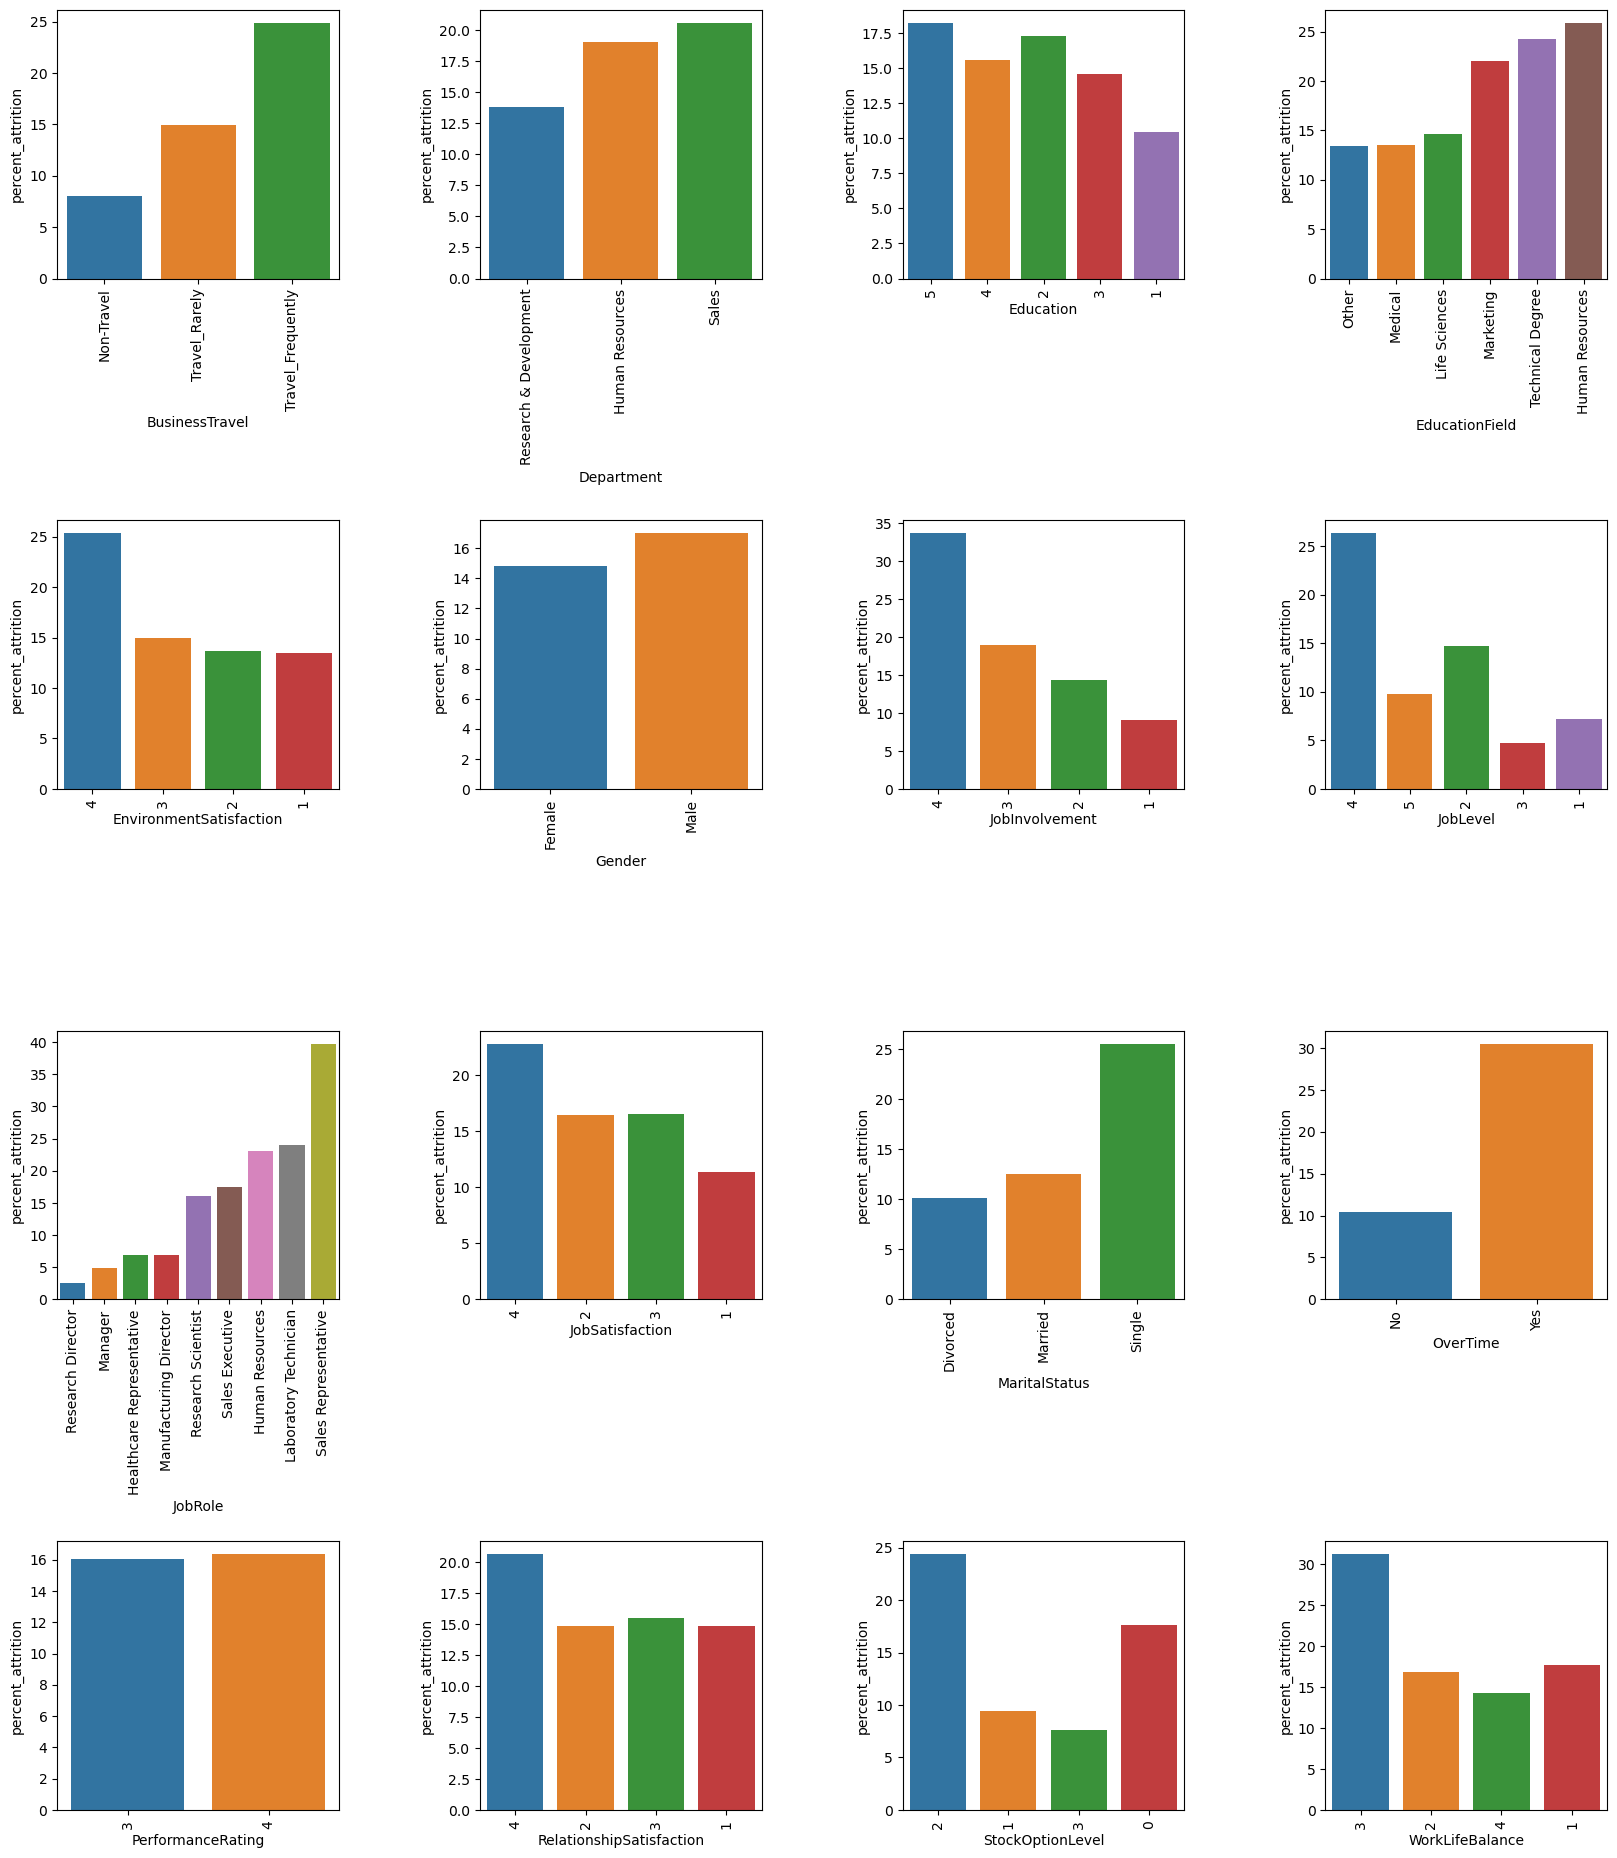

In [173]:
#fig,ax=plt.subplots(4,3,figsize=(20,15))
count=1
plt.figure(figsize=(20,30))
for i in categorical_features[4:]:
    plt.subplot(4,4,count)
    g=sns.barplot(x=cat_plot_data(i,df1).index,y=cat_plot_data(i,df1)['percent_attrition'])
    g.set_xticklabels(cat_plot_data(i,df1).index,rotation=90)
    count+=1
plt.subplots_adjust(wspace=0.5, hspace=0.9, bottom=0.3, top=0.9)



###  What do you think are the 3 factors behind employee attrition?

Based on the visualization of the numerical distributions and the percentage attrition in the various categories' likely factors behind employee attrition (leaving work voluntarily/ lay offs) are:

- Over time : the bar plot shows a large discrepance between percentage attrition in those working over time and those who aren't.
- Retirement: people with very high jobsatisfaction, work-life balance, environment satisfaction, job involvement, travel and education also had quite a higher percent attrition a likely cause might be retirement.
- Distance from home & more income : in the distribution for both Distance from home and monthly income filtered on attrition. The attritted employees stayed farther from home and had less monthly income and both might be likelyy factors

Text(0.5, 0, '')

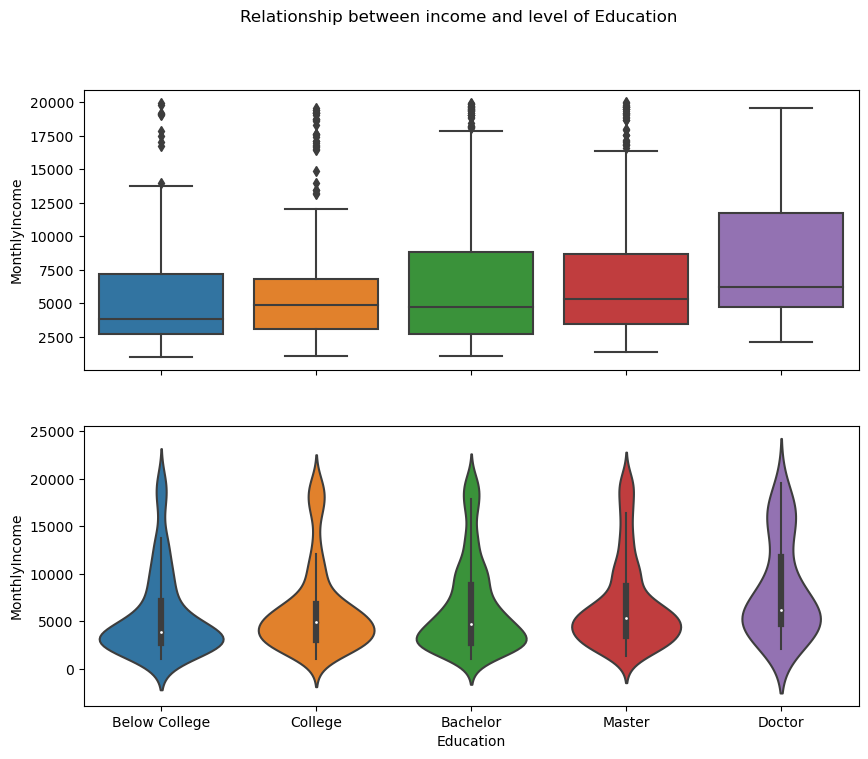

In [195]:
#• What is the relationship between Education and Monthly Income?
fig,ax=plt.subplots(2, sharex=True,figsize=(10,8))
plt.suptitle('Relationship between income and level of Education')
g=sns.violinplot(x='Education',y='MonthlyIncome',data=df1,ax=ax[1])
h=sns.boxplot(x='Education',y='MonthlyIncome',data=df1,ax=ax[0])
g.set_xticklabels([ "Below College","College","Bachelor","Master","Doctor"])
h.set_xlabel(xlabel=None)



### • What is the relationship between Education and Monthly Income?

The monthly income generally increases as the education increase, the largest increase however seems to be from those below college to those in college. There isn't too much difference betwwen college and bachelor education, but the increase is steady from then onwards

Text(0.5, 0.98, 'Distribution of Age based on Attrition')

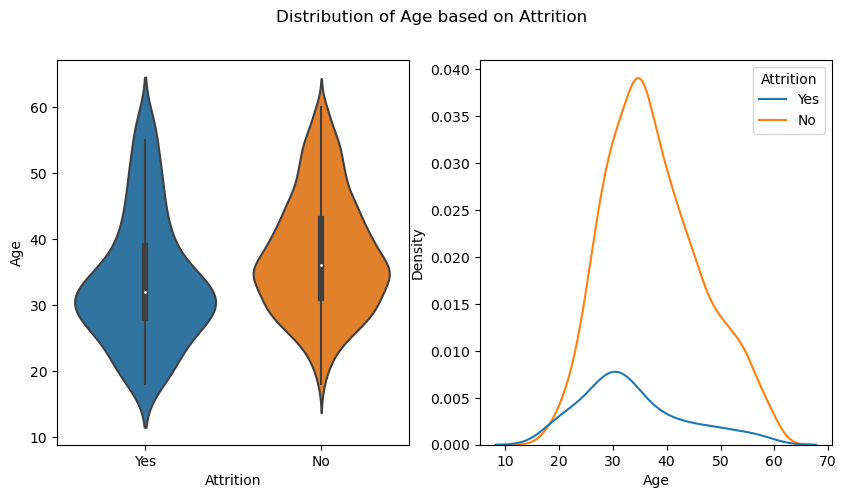

In [211]:
# • What is the effect of age on attrition?
fig,ax=plt.subplots(1,2, figsize=(10,5))
sns.violinplot(x='Attrition',y='Age',data=df1,ax=ax[0])
sns.kdeplot(x='Age',data=df1,hue='Attrition',ax=ax[1])
plt.suptitle('Distribution of Age based on Attrition')

### What is the effect of age on attrition?

younger employees are more affected by attrition compared to older employees. Looking at the violinplot the violin for yes is a bit lower than that of no

In [232]:
# • Is Income the main factor in employee attrition?

df3=df1.groupby('Attrition')['MonthlyIncome'].agg(['mean','median'])
percent_income_diff=(df3['mean'][0]-df3['mean'][1])/df1['MonthlyIncome'].mean()*100
df4=df1.groupby('Attrition')['DistanceFromHome'].agg(['mean','median'])
percent_distancefromhome_diff=(df4['mean'][0]-df4['mean'][1])/df1['DistanceFromHome'].mean()*100
df5=cat_plot_data('OverTime',df1)['percent_attrition']
percentattrition_overtime_diff=(df5[0]-df5[1])
print(f'Difference in monthly income based on attrition {percent_income_diff}, difference in distance from home based on attrition {percent_distancefromhome_diff}, difference in percent attrition between people that work overtime and those not working overtime {percentattrition_overtime_diff}')

Difference in monthly income based on attrition 31.45730348892237, difference in distance from home based on attrition -18.681047986941063, difference in percent attrition between people that work overtime and those not working overtime -20.092413516275


### Is Income the main factor in employee attrition?

- Looking at the percent differences caused by the earlier suggested factors causing attrition, the difference in monthly income is the largest so its safe to say the income is the main factor causing attrition

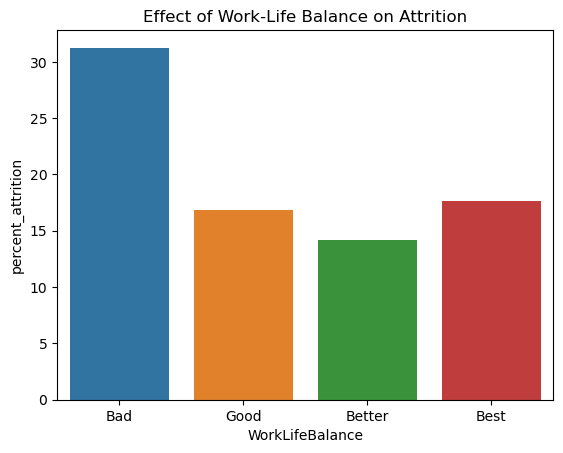

In [238]:
#• How does work-life balance impact the overall attrition rate?

g=sns.barplot(x=cat_plot_data('WorkLifeBalance',df1).index,y=cat_plot_data('WorkLifeBalance',df1)['percent_attrition'])
g.set_xticklabels( ["Bad","Good","Better","Best"])
plt.title('Effect of Work-Life Balance on Attrition')
plt.show()


### How does work-life balance impact the overall attrition rate?

People with bad work-life balance tend to leave work or get fired nearly twice as those with good and better work life balance.
Also, surprising people with even the best work-life balance also leave employment at an higher rate compared with those with good and better work-life balance

- generally an increase in work life balance reduces the rate of attrition up until the highest level of work life balance (best)